In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
def calculate_core(x):
    
    if abs(x) <= 1:
        
        return 0.75 * (1 - x ** 2)
    
    return 0

In [39]:
def calculate_dispersion(arr):
    
    mean = np.mean(arr)
    
    return np.sum((arr - mean) ** 2) / (len(arr) - 1)

In [40]:
def calculate_h(arr):
    
    if len(arr) == 0:
        
        return 0
    
    s = np.sqrt(calculate_dispersion(arr))
    
    return 1.06 * s / (len(arr)) ** (0.2)

In [41]:
def calculate_density(sample):
    
    seq = np.linspace(-1, 5, 10000)
    res = np.array([0 for i in range(10000)])
    
    h = calculate_h(sample)
    
    for xi in sample:
        
        seqi = (seq - xi) / h
        qi = [calculate_core(x) for x in seqi]
        res = res + np.array(qi)
        
    res = res / (len(sample) * h)
        
    return seq, res

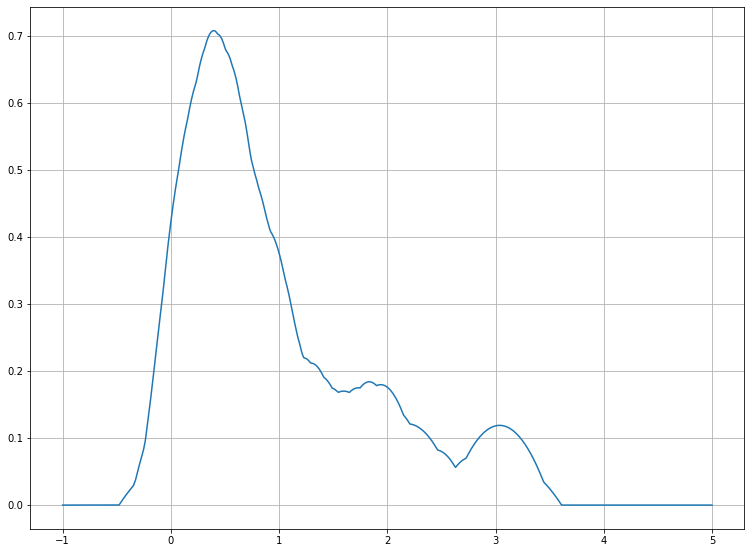

In [42]:
data = pd.read_csv('expovariate.csv')

sample = data.loc[:, 'sample'].to_numpy()

fig, ax = plt.subplots(figsize=(12.8, 9.6))

x, y = calculate_density(sample)

ax.plot(x, y)

plt.grid()
plt.show()